## Understanding Performance Tunning for Training High Accuracy Deep or Shallow Models

### 1. Baseline Model for MNIST dataset 

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time as t

Using TensorFlow backend.


### 1.1 Dataset overview

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


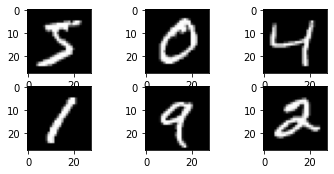

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

for i in range(6):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

### 1.2 Creating Baseline Model

In [3]:
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [4]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [5]:
# define cnn model
def define_model(learning_rate=0.01, batch_size=32):
    model = Sequential()
    model.add(Conv2D(batch_size, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    print("learning_rate", learning_rate)
    print("Batch_size :", batch_size)
    # compile model
    opt = SGD(lr=learning_rate, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [12]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)


learning_rate 0.075
Batch_size : 32
MODEL B SUMMARY :
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Training start time:  1632548121.023919
Train on 60000 samp

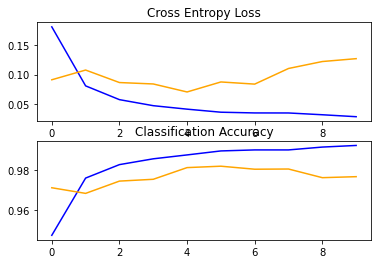

Testing start time:  1632548569.580127
Testing accuracy is   97.670
Testing end time:  1632548571.913425
[[ 969    0    2    0    0    0    3    1    5    0]
 [   0 1117    4    0    1    2    1    2    8    0]
 [   1    0 1005    2    0    0    1    3   20    0]
 [   0    0    5  994    0    2    0    1    6    2]
 [   0    2    2    0  954    0    3    1    3   17]
 [   2    0    1   15    0  859    7    0    6    2]
 [   5    1    2    1    1    1  944    0    3    0]
 [   0    7   13    5    3    1    0  987    3    9]
 [   2    0    0    1    1    2    5    3  957    3]
 [   3    1    0    2    6    3    0    3   10  981]]


In [23]:
# define model
model = define_model(learning_rate=0.075)

#print model summary 
print("MODEL B SUMMARY :")
model.summary()

# train the model 
print("Training start time: ", t.time())
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX,testY))
print("Training end time: ", t.time())# learning curves

#summarizing training history, how model performance increased with each epoch
summarize_diagnostics(history)


# evaluate the model 
print("Testing start time: ", t.time())
loss, acc = model.evaluate(testX, testY, verbose=3)
print("Testing accuracy is ", ' %.3f' % (acc * 100.0))
print("Testing end time: ", t.time())

#saving the model
model_name="model_B"
model.save(model_name,".h5")

# Confusion Matrix
predictions = model.predict(testX)
predictions = np.argmax(predictions,axis = 1)
labels = np.argmax(testY,axis = 1)
confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))



## 2. Tuning Hyper parameters for baseline model
#### We change the learning rate and the batchsize to check how these hyperparamters effect the performance of our baseline model
#### For baseline model , the learning rate  is 0.0075 and  the batch size:32

### Config 1: Learning rate: 0.5 , Batch Size:32

learning_rate 0.5
Batch_size : 32
MODEL C SUMMARY :
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Training start time:  1632531356.406191
Train on 60000 samples

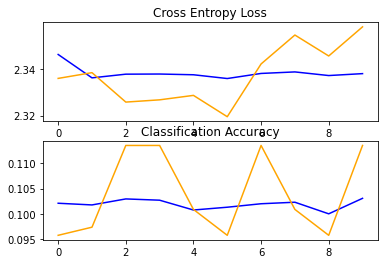

Testing start time:  1632531776.536627
Testing accuracy is   11.350
Testing end time:  1632531778.713221
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


In [13]:
# define model
model = define_model(learning_rate=0.5)

#print model summary 
print("MODEL C SUMMARY :")
model.summary()

# train the model 
print("Training start time: ", t.time())
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX,testY))
print("Training end time: ", t.time())# learning curves

#summarizing training history, how model performance increased with each epoch
summarize_diagnostics(history)


# evaluate the model 
print("Testing start time: ", t.time())
loss, acc = model.evaluate(testX, testY, verbose=3)
print("Testing accuracy is ", ' %.3f' % (acc * 100.0))
print("Testing end time: ", t.time())

#saving the model
model_name="model_C"
model.save(model_name+".h5")

# Confusion Matrix
predictions = model.predict(testX)
predictions = np.argmax(predictions,axis = 1)
labels = np.argmax(testY,axis = 1)
confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))



### 2.2 Config 2 : Learning rate : 0.01, Batch Size:32 

learning_rate 0.01
Batch_size : 32
MODEL A SUMMARY :
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Training start time:  1632563921.14516
Train on 60000 sample

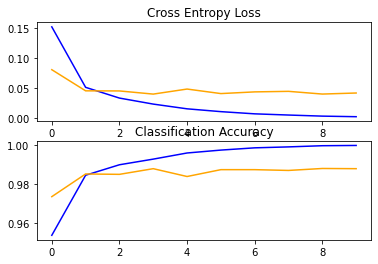

Testing start time:  1632564408.7474592
Testing accuracy is   98.780
Testing end time:  1632564411.4681091

[[ 976    1    0    0    0    1    1    1    0    0]
 [   0 1132    1    0    0    0    1    0    1    0]
 [   1    2 1020    0    1    0    1    6    1    0]
 [   0    0    2 1003    0    4    0    0    1    0]
 [   0    0    2    0  972    0    2    0    1    5]
 [   1    0    0    7    0  879    5    0    0    0]
 [   5    2    0    1    1    1  947    0    1    0]
 [   0    2    9    0    0    0    0 1011    2    4]
 [   4    0    3    4    0    1    0    3  955    4]
 [   2    2    0    3    9    4    0    4    2  983]]


In [26]:
# define model
model = define_model()

#print model summary 
print("MODEL A SUMMARY :")
model.summary()

# train the model 
print("Training start time: ", t.time())
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX,testY))
print("Training end time: ", t.time())# learning curves

#summarizing training history, how model performance increased with each epoch
summarize_diagnostics(history)


# evaluate the model 
print("Testing start time: ", t.time())
loss, acc = model.evaluate(testX, testY, verbose=3)
print("Testing accuracy is ", ' %.3f' % (acc * 100.0))
print("Testing end time: ", t.time())

#saving the model
model_name="model_A"
model.save(model_name+".h5")

# Confusion Matrix
print()
predictions = model.predict(testX)
predictions = np.argmax(predictions,axis = 1)
labels = np.argmax(testY,axis = 1)
confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))



### 2.3 Config 3 : Learning rate : 0.01, Batch Size:20 

learning_rate 0.01
Batch_size : 20
MODEL H SUMMARY :
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 20)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3380)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 100)               338100    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
Total params: 339,310
Trainable params: 339,310
Non-trainable params: 0
_________________________________________________________________
Training start time:  1632564583.757747
Train on 60000 sampl

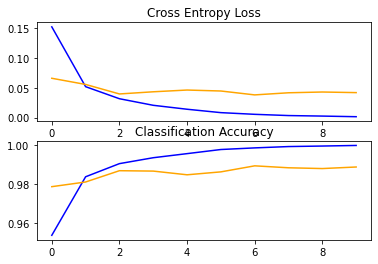

Testing start time:  1632565635.721749
Testing accuracy is   98.870
Testing end time:  1632565643.028563
[[ 973    0    0    1    0    1    2    1    2    0]
 [   0 1129    0    2    1    1    1    1    0    0]
 [   1    3 1018    0    4    0    0    4    2    0]
 [   0    0    0 1001    0    3    0    2    3    1]
 [   0    1    0    0  969    0    5    0    1    6]
 [   0    0    0    8    0  881    3    0    0    0]
 [   3    2    0    0    1    1  951    0    0    0]
 [   0    0    3    1    1    0    0 1020    1    2]
 [   3    0    0    1    0    2    1    2  963    2]
 [   1    1    0    4    8    5    0    4    4  982]]


In [27]:
# define model
model = define_model(learning_rate=0.01,batch_size=20)

#print model summary 
print("MODEL H SUMMARY :")
model.summary()

# train the model 
print("Training start time: ", t.time())
history = model.fit(trainX, trainY, epochs=10, batch_size=20, validation_data=(testX,testY))
print("Training end time: ", t.time())# learning curves

#summarizing training history, how model performance increased with each epoch
summarize_diagnostics(history)


# evaluate the model 
print("Testing start time: ", t.time())
loss, acc = model.evaluate(testX, testY, verbose=3)
print("Testing accuracy is ", ' %.3f' % (acc * 100.0))
print("Testing end time: ", t.time())

#saving the model
model_name="model_H"
model.save(model_name+".h5")

# Confusion Matrix
predictions = model.predict(testX)
predictions = np.argmax(predictions,axis = 1)
labels = np.argmax(testY,axis = 1)
confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))

### 2.4 Config 4: Learning rate : 0.001, Batch Size:20 

learning_rate 0.001
Batch_size : 20
MODEL G SUMMARY :
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 20)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 3380)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 100)               338100    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1010      
Total params: 339,310
Trainable params: 339,310
Non-trainable params: 0
_________________________________________________________________
Training start time:  1632565844.33784
Train on 60000 sampl

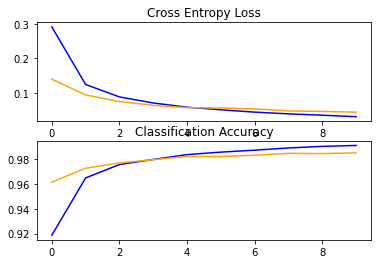

Testing start time:  1632566853.4977322
Testing accuracy is   98.510
Testing end time:  1632566859.3556328
[[ 974    0    1    0    0    1    1    1    2    0]
 [   0 1129    1    1    0    1    1    2    0    0]
 [   3    4 1012    1    1    0    3    3    4    1]
 [   0    0    0  999    0    7    0    1    2    1]
 [   0    0    1    0  968    0    4    0    0    9]
 [   2    0    0    4    0  881    3    0    2    0]
 [   7    3    0    0    1    3  943    0    1    0]
 [   1    2    5    2    0    0    0 1011    3    4]
 [   6    0    2    1    1    2    0    0  958    4]
 [   3    4    1    4    6    8    1    6    0  976]]


In [28]:
# define model
model = define_model(learning_rate=0.001,batch_size=20)

#print model summary 
print("MODEL G SUMMARY :")
model.summary()

# train the model 
print("Training start time: ", t.time())
history = model.fit(trainX, trainY, epochs=10, batch_size=20, validation_data=(testX,testY))
print("Training end time: ", t.time())# learning curves

#summarizing training history, how model performance increased with each epoch
summarize_diagnostics(history)


# evaluate the model 
print("Testing start time: ", t.time())
loss, acc = model.evaluate(testX, testY, verbose=3)
print("Testing accuracy is ", ' %.3f' % (acc * 100.0))
print("Testing end time: ", t.time())

#saving the model
model_name="model_G"
model.save(model_name+".h5")

# Confusion Matrix
predictions = model.predict(testX)
predictions = np.argmax(predictions,axis = 1)
labels = np.argmax(testY,axis = 1)
confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))


## 3. ADDITIONAL ANALYSIS

### Config : Learning rate : 0.1, Batch Size:100

learning_rate 0.1
Batch_size : 100
MODEL D SUMMARY :
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 100)       1000      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16900)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               1690100   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 1,692,110
Trainable params: 1,692,110
Non-trainable params: 0
_________________________________________________________________
Training start time:  1632532012.544757
Train on 60000 sa

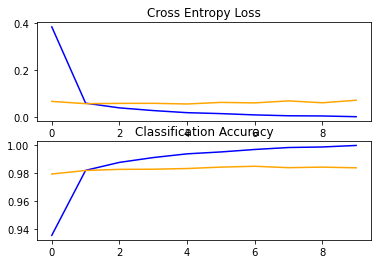

Testing start time:  1632536012.520166
Testing accuracy is   98.370
Testing end time:  1632536042.022678


KeyboardInterrupt: 

In [14]:
# define model
model = define_model(learning_rate=0.1, batch_size=100)

#print model summary 
print("MODEL D SUMMARY :")
model.summary()

# train the model 
print("Training start time: ", t.time())
history = model.fit(trainX, trainY, epochs=10, batch_size=100, validation_data=(testX,testY))
print("Training end time: ", t.time())# learning curves

#summarizing training history, how model performance increased with each epoch
summarize_diagnostics(history)


# evaluate the model 
print("Testing start time: ", t.time())
loss, acc = model.evaluate(testX, testY, verbose=3)
print("Testing accuracy is ", ' %.3f' % (acc * 100.0))
print("Testing end time: ", t.time())

#saving the model
model_name="model_D"
model.save(model_name,".h5")

# Confusion Matrix
predictions = model.predict(testX)
predictions = np.argmax(predictions,axis = 1)
labels = np.argmax(testY,axis = 1)
confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))



### Config: Learning rate : 0.5, Batch Size:100


learning_rate 0.5
Batch_size : 100
MODEL E SUMMARY :
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 100)       1000      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16900)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               1690100   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 1,692,110
Trainable params: 1,692,110
Non-trainable params: 0
_________________________________________________________________
Training start time:  1632536100.659231
Train on 60000 sa

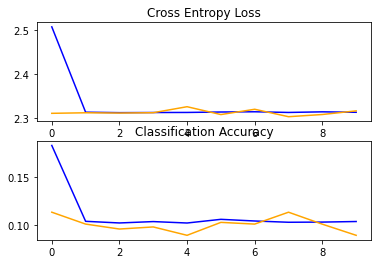

Testing start time:  1632539854.085818
Testing accuracy is   8.920
Testing end time:  1632539879.103255
[[   0    0    0    0    0  980    0    0    0    0]
 [   0    0    0    0    0 1135    0    0    0    0]
 [   0    0    0    0    0 1032    0    0    0    0]
 [   0    0    0    0    0 1010    0    0    0    0]
 [   0    0    0    0    0  982    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    0    0    0  958    0    0    0    0]
 [   0    0    0    0    0 1028    0    0    0    0]
 [   0    0    0    0    0  974    0    0    0    0]
 [   0    0    0    0    0 1009    0    0    0    0]]


In [15]:
# define model
model = define_model(learning_rate=0.5,batch_size=100)

#print model summary 
print("MODEL E SUMMARY :")
model.summary()

# train the model 
print("Training start time: ", t.time())
history = model.fit(trainX, trainY, epochs=10, batch_size=100, validation_data=(testX,testY))
print("Training end time: ", t.time())# learning curves

#summarizing training history, how model performance increased with each epoch
summarize_diagnostics(history)


# evaluate the model 
print("Testing start time: ", t.time())
loss, acc = model.evaluate(testX, testY, verbose=3)
print("Testing accuracy is ", ' %.3f' % (acc * 100.0))
print("Testing end time: ", t.time())

#saving the model
model_name="model_E"
model.save(model_name,".h5")

# Confusion Matrix
predictions = model.predict(testX)
predictions = np.argmax(predictions,axis = 1)
labels = np.argmax(testY,axis = 1)
confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))


### Config : Learning rate : 0.05, Batch Size:20

learning_rate 0.005
Batch_size : 20
MODEL F SUMMARY :
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               338100    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 339,310
Trainable params: 339,310
Non-trainable params: 0
_________________________________________________________________
Training start time:  1632540332.167257
Train on 60000 sampl

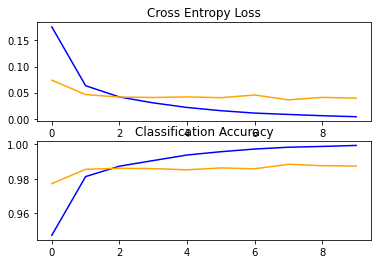

Testing start time:  1632541334.795155
Testing accuracy is   98.740
Testing end time:  1632541340.671016


ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for 'confusion_matrix_4/remove_squeezable_dimensions/Squeeze' (op: 'Squeeze') with input shapes: [10000,10].

In [17]:
# define model
model = define_model(learning_rate=0.005,batch_size=20)

#print model summary 
print("MODEL F SUMMARY :")
model.summary()

# train the model 
print("Training start time: ", t.time())
history = model.fit(trainX, trainY, epochs=10, batch_size=20, validation_data=(testX,testY))
print("Training end time: ", t.time())# learning curves

#summarizing training history, how model performance increased with each epoch
summarize_diagnostics(history)


# evaluate the model 
print("Testing start time: ", t.time())
loss, acc = model.evaluate(testX, testY, verbose=3)
print("Testing accuracy is ", ' %.3f' % (acc * 100.0))
print("Testing end time: ", t.time())

#saving the model
model_name="model_F"
model.save(model_name,".h5")

# Confusion Matrix
predictions = model.predict(testX)
predictions = np.argmax(predictions,axis = 1)
labels = np.argmax(testY,axis = 1)
confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))



In [18]:
confusion_matrix = tf.math.confusion_matrix(
    labels, predictions, num_classes=10
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))



[[ 973    0    1    0    0    0    2    2    2    0]
 [   0 1122    2    1    1    0    3    2    4    0]
 [   1    1 1015    1    1    0    0    5    6    2]
 [   0    0    2 1004    0    2    0    0    2    0]
 [   0    0    2    0  970    0    1    0    1    8]
 [   1    0    0    6    0  882    3    0    0    0]
 [   5    2    1    0    1    2  946    0    1    0]
 [   1    0    4    2    0    0    0 1018    0    3]
 [   5    0    1    0    1    4    0    2  957    4]
 [   1    0    0    6    9    1    0    3    2  987]]
